In [5]:
import dynamics_modeling.utils
from importlib import reload

reload(dynamics_modeling.utils)

from dynamics_modeling.utils import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots as _

plt.style.use("ieee")

## Precipitation Data

> Beware: URLs, data formats, etc. can change, so this may be out of date.

### Hourly Observations

Fetch from the Iowa Enviromental Mesonet (IEM) dataset of [hourly observations on the Arizona ASOS network](https://mesonet.agron.iastate.edu/request/download.phtml?network=AZ_ASOS) using these options:

- `[PGA] PAGE MUNI (AMOS) (1973-Now)`
- Data: `All Available`
- Date Range\*
  - Start: `1957/01/01`
  - End: `2005/12/31`
- Timezone: `Coordinated Universal Time (UTC)`
- Download Options
  - Latitutde + Longitude: `No`
  - Elevation: `No`
  - Missing Data: `Use blank/empty string`
  - Trace Reports: `Use float 0.0001`
  - `View result data in web browser` (optional, but you get to see the data before downloading)

Exact query URL: https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=PGA&data=all&year1=1957&month1=1&day1=1&year2=2005&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=no&elev=no&missing=empty&trace=0.0001&direct=no&report_type=3&report_type=4

### Daily Observations

Exact Query URL: https://mesonet.agron.iastate.edu/cgi-bin/request/daily.py?network=AZ_ASOS&stations=PGA&year1=1928&month1=1&day1=1&year2=2023&month2=12&day2=31&var=precip_in&na=blank&format=csv

Ensure you download/modify the file to have the `.csv` extension.

> \*Supposedly because of availability limitations, data actually starts at 1973/2/1. Even then, many values may be missing.


In [6]:
# hourly_df = load_hourly_mesonet("./dynamics_modeling/precip_hourly_1973_2005.csv")
daily_df = load_daily_mesonet("./dynamics_modeling/precip_daily_2022.csv")

print(
    # hourly_df["valid"].max() - hourly_df["valid"].min(),
    daily_df["time"].max()
    - daily_df["time"].min(),
)

364 days 00:00:00


In [7]:
avg_daily = daily_df.groupby(daily_df["time"].dt.dayofyear)["precip"].sum()
avg_weekly = daily_df.groupby(daily_df["time"].dt.isocalendar().week)["precip"].sum()
avg_monthly = daily_df.groupby(daily_df["time"].dt.month)["precip"].sum()

pd.DataFrame(avg_daily).to_csv("./dynamics_modeling/precip_daily.csv")
pd.DataFrame(avg_weekly).to_csv("./dynamics_modeling/precip_weekly.csv")
pd.DataFrame(avg_monthly).to_csv("./dynamics_modeling/precip_monthly.csv")

avg_daily.describe(), avg_weekly.describe(), avg_monthly.describe()

(count    365.000000
 mean       0.000350
 std        0.001564
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        0.016764
 Name: precip, dtype: float64,
 count    52.000000
 mean      0.002454
 std       0.004768
 min       0.000000
 25%       0.000000
 50%       0.000004
 75%       0.002099
 max       0.019307
 Name: precip, dtype: float64,
 count    12.000000
 mean      0.010633
 std       0.009545
 min       0.000000
 25%       0.003496
 50%       0.006989
 75%       0.019826
 max       0.026673
 Name: precip, dtype: float64)

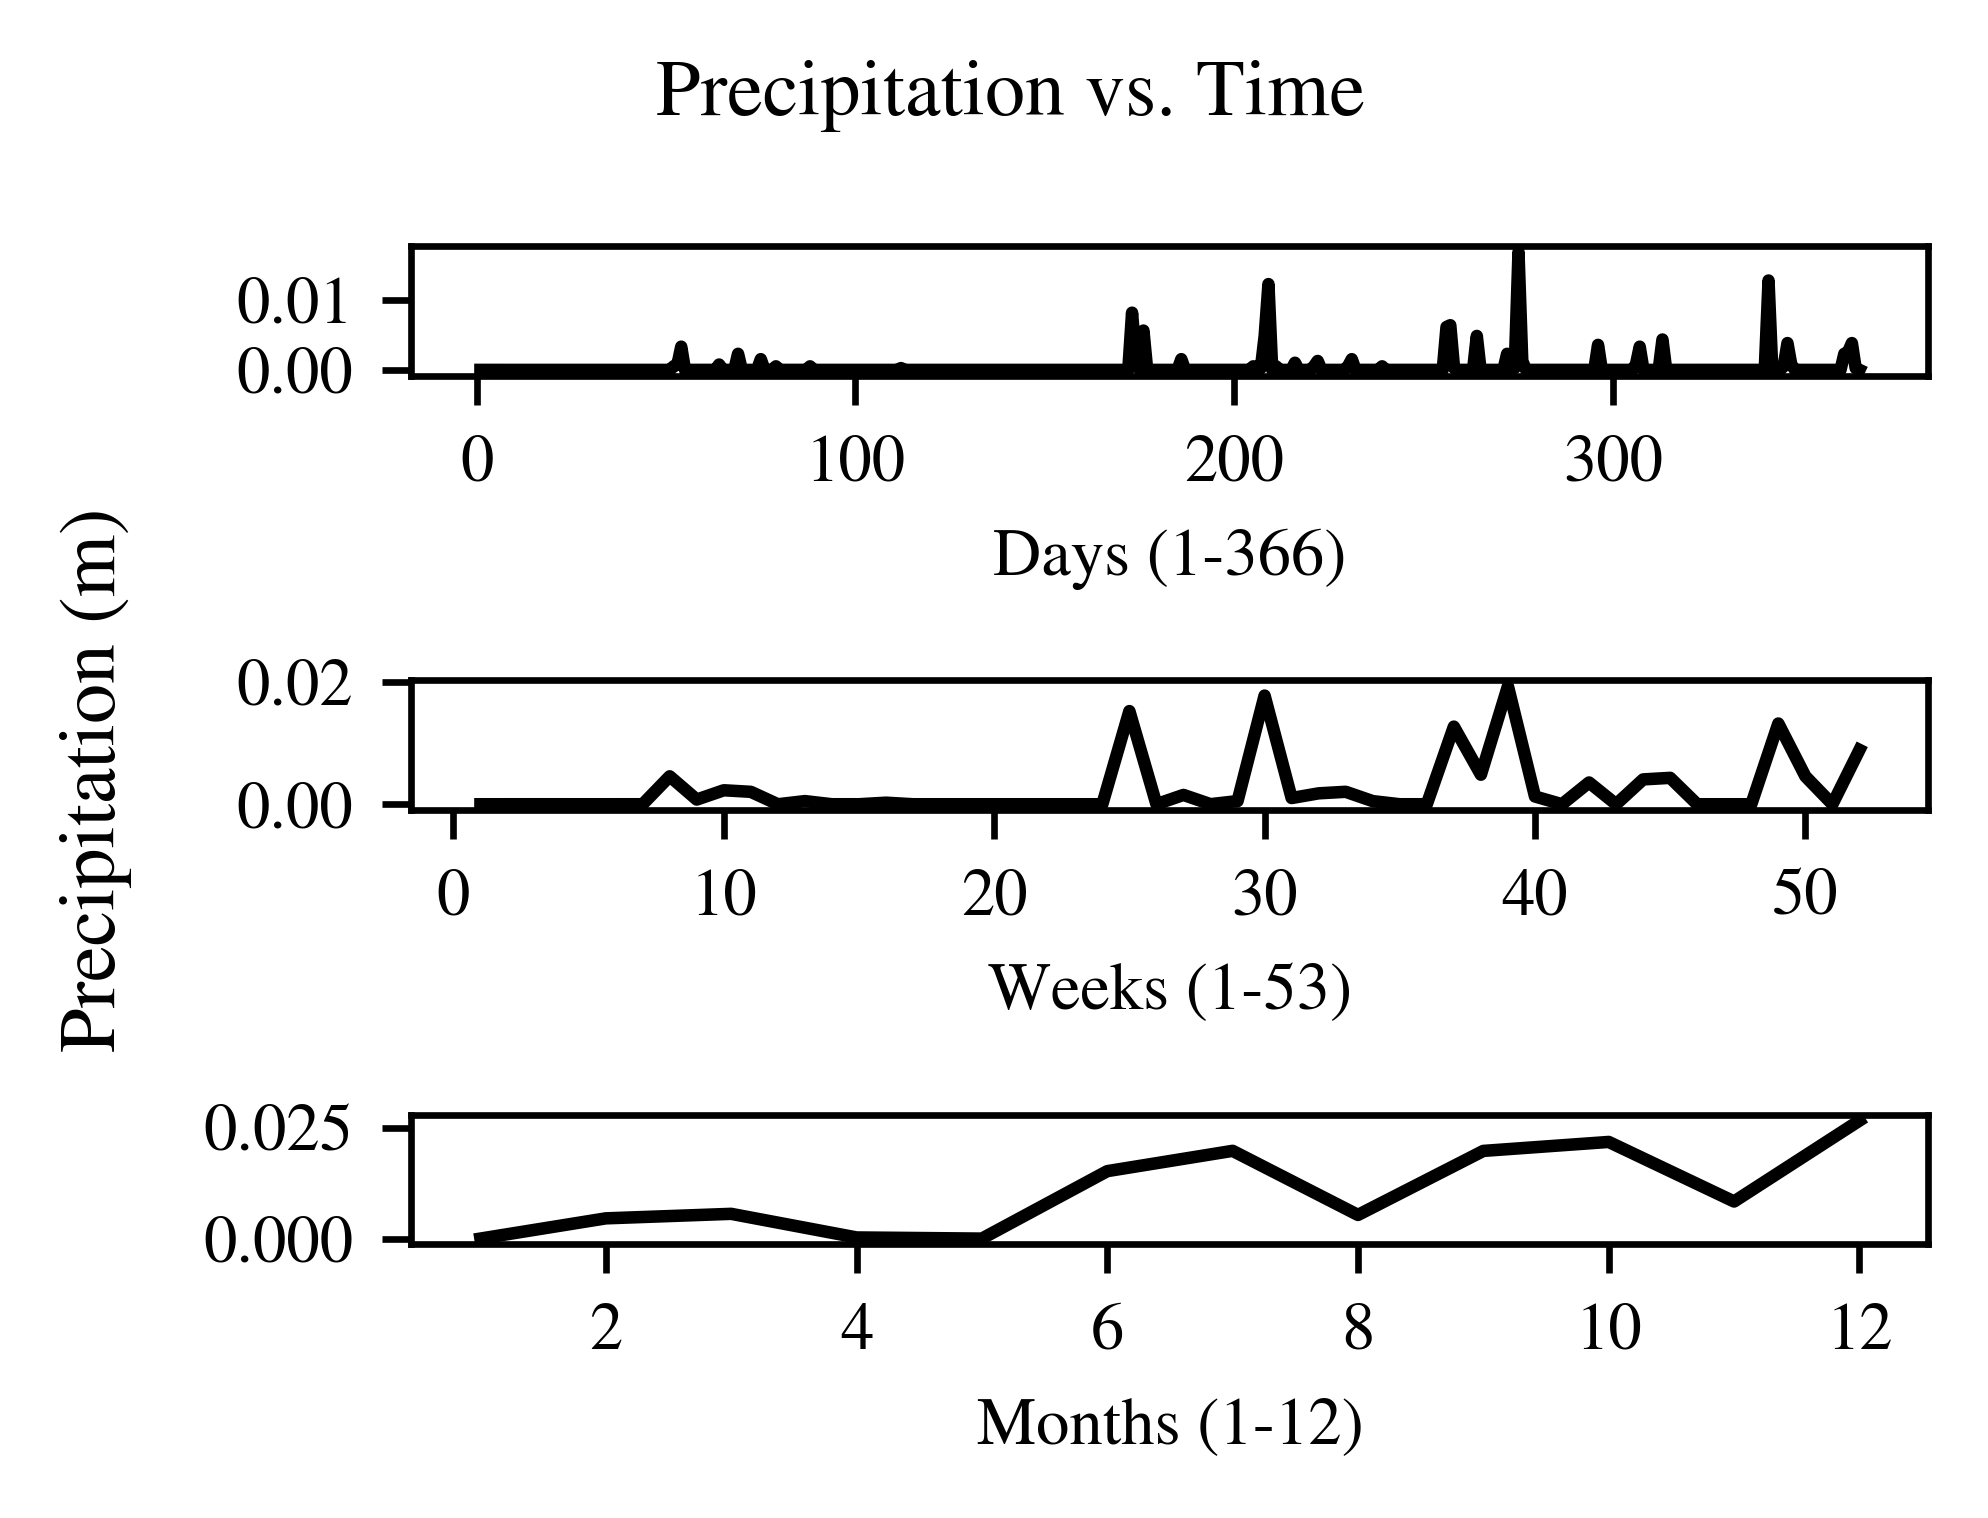

In [8]:
fig, ax = plt.subplots(3, 1)
fig.suptitle("Precipitation vs. Time")
fig.supylabel("Precipitation (m)")

ax[0].plot(avg_daily)
ax[0].set_xlabel("Days (1-366)")
ax[1].plot(avg_weekly)
ax[1].set_xlabel("Weeks (1-53)")
ax[2].plot(avg_monthly)
ax[2].set_xlabel("Months (1-12)")

fig.tight_layout()